## Datenanalyse III: Matplotlib ##

Wir haben matplotlib bereits kennengelernt, als wir Graphen geplottet haben. Es handelt sich dabei um eine komplexe Grafikbibliothek, die es erlaubt, auch sehr komplexe Grafiken zu erstellen. Leider ist dies mnachmal mit einer gewissen Komplexität der Bibliothek selbst verbunden. Matplotlib kennt drei Modi: <br/>
<ul><li>pylab (eine an MATLAB orientierte sehr einfache Schnittstelle, die aus historischen Gründen vorhanden ist, die ich aber nicht behandeln werde), </li>
<li>pyplot, eine prozuderale Schnittstelle zur Bibliothek. Die Grafikbefehle werden in der Reihenfolge der Eingabe im Hintergrund geplottet und mit dem Befehl plt.show() angezeigt. Wir importieren die Teilbibliothek pyplot mit dem alias plt.</li>
<li>eine objektorientierte Schnittstelle, die völlige Kontrolle über jeden Aspekt der Grafik ermöglicht, aber mehr Schreibarbeit verlangt. </li>
</ul>
Im folgenden werden wir erst einmal die pyplot-Schnittstelle behandeln, mit der man die meisten Aufgaben erledigen kann, bevor wir auf die OO-Schnittstelle für einige weiterführende Beispiele eingehen. 
Im folgenden Beispiel bestimmen wir erst die x und y Koordinaten von Datenpunkten als Listen und plotten sie dann.


In [12]:
%matplotlib inline  
#shows matplotlib plot inline in ipython notebook


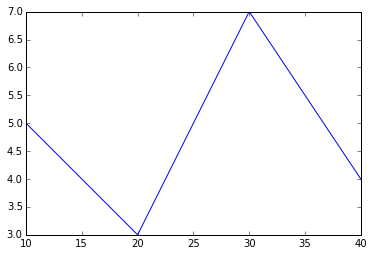

In [13]:
import matplotlib.pyplot as plt
x = [10,20,30,40]
y = [5, 3, 7, 4]
plt.plot(x,y)
plt.show()

Anstelle von Python-Listen können wir auch numpy-Arrays oder pandas-Series verwenden:

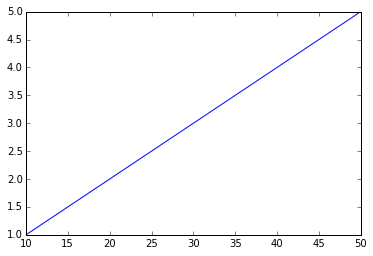

In [14]:
import numpy as np
x = np.arange(10,60,10)
y = np.arange(1,6)
plt.plot(x,y)
plt.show()

Da die Menge der x-Werte der Anzahl der y-Werte entsprechen muss, ist es oft einfacher, die einen über eine Funktion aus den anderen zu erzeugen:

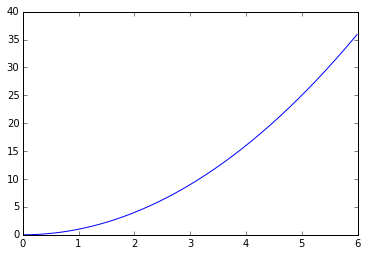

In [15]:
x = np.arange(0.0, 6.0, 0.01)
plt.plot(x, [x**2 for x in x])
plt.show()

Und auch hier gilt, dass wir mehrere Elemente, z.B. Linien, zeichnen können, bevor wir uns die Gesamtgrafik anzeigen lassen. (Das liegt übrigens daran, dass plt.hold() auf True voreingestellt ist; wenn man den Wert False setzt, dann wird nach jedem plot-Befehl der Canvas zurückgesetzt):

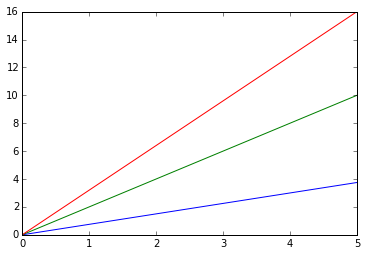

In [16]:
x = np.arange(0,6)
plt.plot(x, [0.75*xi for xi in x])
plt.plot(x, [2*xi for xi in x])
plt.plot(x, [3.2*xi for xi in x])
plt.show()

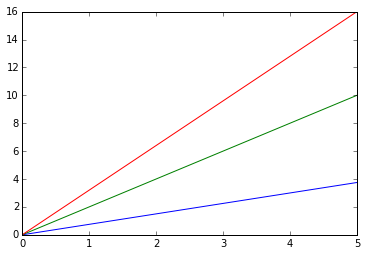

In [17]:
#oder das gleiche kürzer mit etwas Vektorenrechnung:
x = np.arange(0,6)
plt.plot(x, 0.75*x, x, 2*x, x, 3.2*x)
plt.show()

Das folgende Beispiel zeigt, wie wir 1) ein Netz im Hintergrund einsetzen, 2) Beschriftungen für die x- und y-Achse einfügen, 3) die x-Achse und y-Achse, die bislang automatisch gesetzt wurden, nun explizit setzen - und damit auch die Skalierung der Grafik, 4) den Titel der Grafik setzen, 5) .  

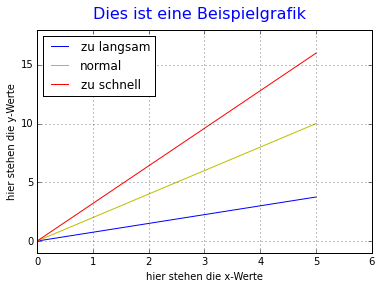

In [18]:
#hier sind die schon bekannten Werte
x = np.arange(0,6)

#und hier zeichnen wir damit Linien
#Werte für color: b blue, c cyan, g green, k black, m magenta, r red, w white, y yellow, 
#die Werte für label werden dann in der Legende verwendet
plt.plot(x, 0.75*x, color="b", label="zu langsam" )
plt.plot(x, 2*x, color="y", label="normal") 
plt.plot(x, 3.2*x, color="r", label="zu schnell")

#Beschriftung der x-Achse
plt.xlabel("hier stehen die x-Werte")
#Beschriftung der y-Achse
plt.ylabel("hier stehen die y-Werte")

#mit dem folgenden Befehl setzen wir die Grenzen der x und y - Achsen
#die ersten beiden Zahlen bestimmen Anfang und Ende der x-Achse usw.
#automatisch würden hier die Werte [0,5,0,16] stehen
plt.axis([0,6,-1,18])

#zeichnet ein Netz hinter den Linien, womit sich oft Werte besser lesen lassen
plt.grid(True)

#hiermit setzen wir den Titel der Grafik
#title bestimmt den Titel für die Einzelgrafik und suptitle bestimmt den Titel für die Gesamtgrafik 
#(man kann mehrere Grafiken in einer Gesamtgrafik zusammenfassen.)  
plt.suptitle("Dies ist eine Beispielgrafik", fontsize=16, color="blue")


#erstellt eine Legende aus den labels der plot-Anweisungen und positioniert sie.
#andere Werte für loc sind 'upper/lower/center right/left' 
plt.legend(loc="upper left")
#zeigt die Grafik an
plt.show()

Im folgenden Beispiel spezifizieren wir die Art der Linie, den Marker, die Linienbreite, aber auch den Ort und das Label der x- und y-Achsen sowie frei positionierbare Texte.

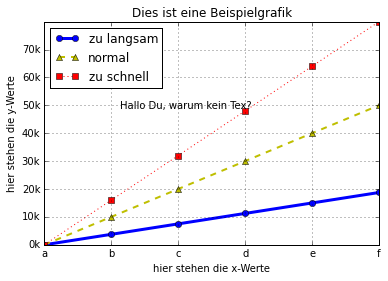

In [19]:
#hier sind die schon bekannten Werte
x = np.arange(0,6)

#und hier zeichnen wir damit Linien
#linestyle: - durchgezogene Linie, -- gestrichelte Linie, : gepunktete Linie 
#marker (Auswahl): o ^s 1 2 < > p * h H + x D d
plt.plot(x, 0.75*x, color="b", marker="o", linestyle="-", linewidth=3, label="zu langsam" )
plt.plot(x, 2*x, color="y", marker="^", linestyle="--", linewidth=2, label="normal") 
plt.plot(x, 3.2*x, color="r", marker="s", linestyle=":", linewidth=1, label="zu schnell")

#Beschriftung der x-Achse
plt.xlabel("hier stehen die x-Werte")
#Beschriftung der y-Achse
plt.ylabel("hier stehen die y-Werte")

#mit der Funktion xticks setzen wir die Position und das Label der Striche auf der X-Achse
#beides übergeben wir als Liste
plt.xticks(range(6), ["a","b","c","d","e","f"])

#ditto mit der y-Achse
plt.yticks(range(0,16,2), ["0k", "10k", "20k", "30k", "40k", "50k", "60k", "70k", "80k"])

#freier Text, der über die x,y Koordinaten positioniert wird
#mit plt.text() verwendet man die Koordinaten mit den Datenwerten
#plt.text(1, 7, "Hier steht Text")
#mit plt.figtext() ist der 0-Punkt unten links (0,0) und der Gegenpunkt oben rechts (1,1)
plt.figtext(0.3,0.6, "Hallo Du, warum kein Tex?")

#zeichnet ein Netz hinter den Linien, womit sich oft Werte besser lesen lassen
plt.grid(True)

#hiermit setzen wir den Titel der Grafik
plt.title("Dies ist eine Beispielgrafik")

#erstellt eine Legende aus den labels der plot-Anweisungen und positioniert sie.
#andere Werte für loc sind 'upper/lower/center right/left' 
plt.legend(loc="upper left")
#zeigt die Grafik an
plt.show()

Hier noch einmal die ganzen Möglichkeiten, eine Grafik zu gestalten</br>
<img src="/files/images/matplotlib1.png" width=600/>
Was wir nicht behandelt haben: annotate(), womit man Text auf bestimmte Datenpunkte beziehen kann, und arrow() womit man Pfeile in eine Grafik einzeichnen kann.

Man kann eine Grafik auf zweierlei Weise speichern. Zum einen können wir sie aus dem Anzeigefenster speichern, zum anderen können wir sie, ohne sie anzeigen zu lassen, abspeichern, indem wir plt.savefig() vor  plt.show() aufrufen. <br/>
<img src="files/images/matplotlib3.png" width=500/>
Unten rechts finden Sie den Speicherknopf (etwas altmodisch in Form einer Diskette). <br/>
Oder eben mittels plt.savefig() - nicht vergessen: Sie können diesen Befehl nur vor  plt.show() verwenden, nicht dahinter, da plt.show() die Grafik zurücksetzt.

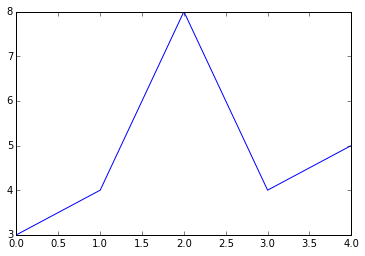

In [20]:
x = [3, 4, 8, 4, 5]
plt.plot(x)
plt.savefig("example.png", dpi=200)
plt.show()

### Andere Chart-Typen: Pie Charts, Bar Charts, Histogramme, usw.

#### Pie Charts

Pie-Charts kennen wir alle aus der Zeitung, z.B. bei der Anzeige von Wahlergebnissen. Sie dienen der Anzeige von Verteilungen einer Gesamtheit (z.B. alle Wahlstimmen) über eine kleine Anzahl von Einheiten (z.B. alle Parteien).

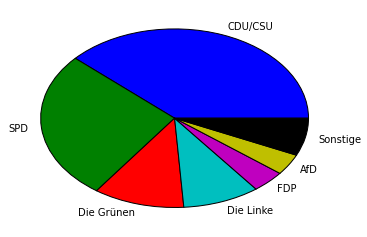

In [21]:
#Daten + labels
election =  [38.3, 26.8, 11.0, 9.3, 4.0, 3.8, 6.8 ]
labels = ["CDU/CSU","SPD","Die Grünen","Die Linke","FDP","AfD","Sonstige"]
#plotting
plt.pie(election,labels=labels)
plt.show()

Leider funktionieren die Voreinstellungen hier nicht befriedigend: der Kreis wird als Elipse dargestellt, deshalb muss man die Gesamtgrafik (figure) explizit auf ein Quadrat setzen (mehr dazu unten). Außerdem können wir die Farben explizit setzen:

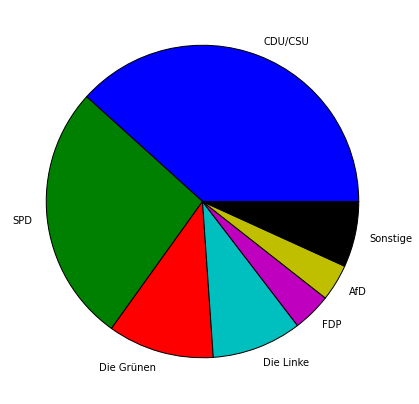

In [22]:
election =  [38.3, 26.8, 11.0, 9.3, 4.0, 3.8, 6.8 ]
labels = ["CDU/CSU","SPD","Die Grünen","Die Linke","FDP","AfD","Sonstige"]
plt.figure(figsize=(7,7))
plt.pie(election,labels=labels)
plt.show()

Mit dem keyword explode können wir die Grafik außerdem etwas dynamischer gestalten; die einzelnen Kuchenstücke werden nun herausgerückt. Wir übergeben dem keyword eine Liste, die soviele Werte enthält, wie wir Kuchenstücke haben. Die Größe des Wertes zeigt an, um wieviel das Stück herausgeschoben ist. <br/>
Außerdem können wir mit dem keyword autopct festlegen, wie die Werte angezeigt werden sollen. Hier wird die Formatierungssprache verwendet, die auch im Python-Handbuch in  Abschnitt 4.7.2 printf-style formatting erläutert wird.

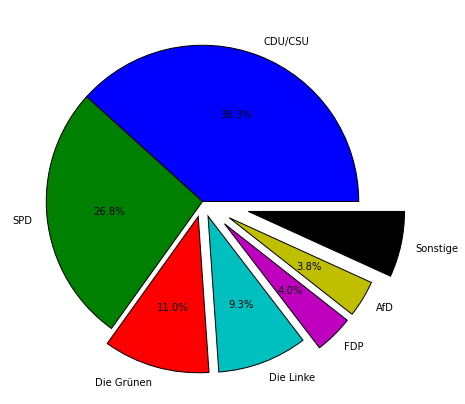

In [23]:
explode = [0,0,0.1,0.1,0.2,0.2,0.3]
plt.figure(figsize=(7,7))
plt.pie(election,labels=labels,explode=explode, autopct='%1.1f%%')
plt.show()

#### Bar Charts

Bar Charts sind Säulendiagramme, mit denen man ebenfalls die Ausprägung von wenigen Ergebnissen anzeigen kann (man sieht nur nicht so gut, dass es insgesamt 100% sind, dafür sind die Größenunterschiede besser zu sehen). Wir übergeben die x und y Werte als Listen, wobei der erste Eintrag in beiden Listen die Angaben für die erste Säulen enthält:

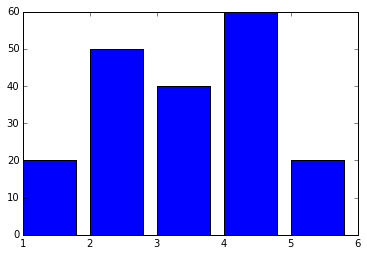

In [24]:
x = [1,2,3,4,5]
y = [20,50,40,60,20]
plt.bar(x,y)
plt.show()

Wenn wir die Daten schon in Form zusammengehöriger Tupels vorliegen haben, dann rufen wir einfach den Befehl entsprechend oft auf:

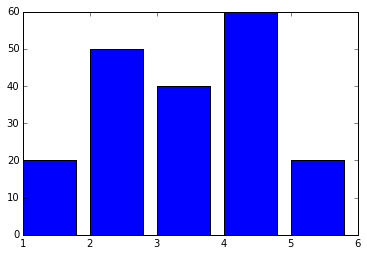

In [25]:
data = [(1,20),(2,50),(3,40),(4,60),(5,20)]
[plt.bar(x[0],x[1]) for x in data]
plt.show()

Nun stellen wir unsere Wahlergebnisse noch einmal dar:

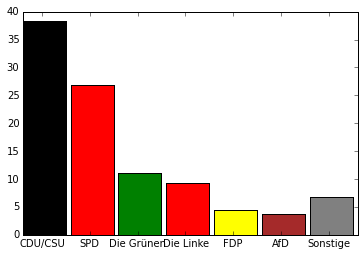

In [26]:
import matplotlib.pyplot as plt
import numpy as np
election =  [38.3, 26.8, 11.0, 9.3, 4.5, 3.8, 6.8 ]
labels = ["CDU/CSU","SPD","Die Grünen","Die Linke","FDP","AfD","Sonstige"]
color = ["black","red","green","red","yellow","brown","grey"]
#die x-Werte sind hier einfache Zahlen, da wir eigentlich nur eine Reihe brauchen
#da die Labels relativ breit sind, machen wir auch die bars mit width etwas breiter (default=0.8)
plt.bar(range(len(election)), election, color=color, width=0.9)
#aber nun wollen wir unsere Beschriftung der x-Achse ändern: sie soll die Dateien 
#da die Ticks immer unter der ersten Linie einer Säule anfangen, wir aber den Text in der Mitte stehen haben wollen,
#müssen wir die Position der Labels im ersten Parameter etwas nach rechts verschieben, indem wir 0.4 hinzu addieren (Vektoralgebra!)
plt.xticks(np.arange(len(labels))+0.4, labels)
plt.show()

#### Histogramme

Histogramme werden zumeist verwendet, um Häufigkeiten in Form von Säulen anzuzeigen. Die Säulen repräsentieren die Häufigkeit, mit der Datenpunkte in diese Kategorie (bins) fallen. Wohlgemerkt: Das Histogramm zeigt an, wie häufig (= x-Wert) ein Datenpunkt mit einer gewissen Ausprägung (=y-Wert) vorkommt. Nehmen wir an, wir würfeln 20-mal mit einem 6-seitigen Würfel und lassen uns dann die Werte anzeigen:

Das ist natürlich besonders sinnvoll, wenn man sehr viele Werte hat:

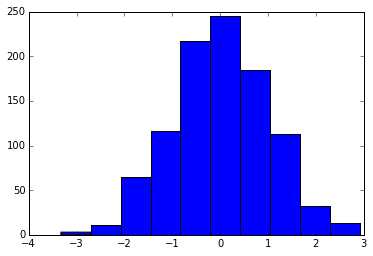

In [27]:
import matplotlib.pyplot as plt
import numpy as np
#Datenerzeugung: erzeugt 1000 Zufallszahlen, deren Verteilung der Normalverteilung folgt
y = np.random.randn(1000)
#plotting. default für bins = 10
plt.hist(y)
plt.show()

Indem wir die Anzahl der bins hochsetzen, können wir die Normalverteilung deutlicher sehen:

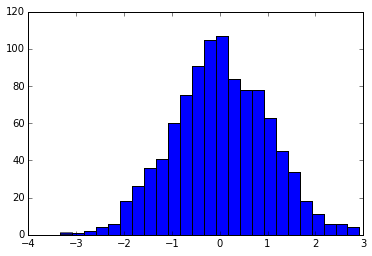

In [28]:
plt.hist(y,25)
plt.show()

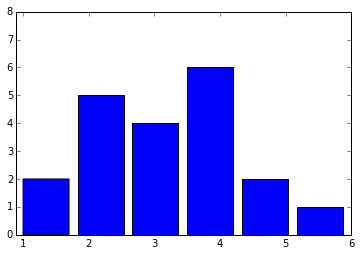

[4, 3, 2, 2, 1, 5, 2, 3, 4, 5, 2, 2, 3, 6, 1, 3, 4, 4, 4, 4]

In [29]:
import random
#Datenerzeugung: wir simulieren das Würfeln 20mal
x = [random.randint(1, 6) for i in range(20)]
#plotting
#alternatives setzen der Grenzen der y-Achse
plt.ylim(0,8)
plt.xlim(0.9,6)
plt.hist(x, bins=6,width=0.7)
plt.show()
x

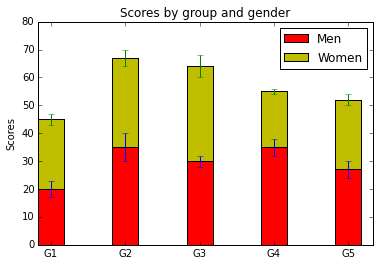

In [30]:
#komplexes Beispiel aus der matplotlib-Dokumentation:
N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r', yerr=womenStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=menStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width/2., ('G1', 'G2', 'G3', 'G4', 'G5') )
plt.yticks(np.arange(0,81,10))
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()


#### Scatter Plots

Scatter plots visualisieren Datenwerte in Abhängigkeit von zwei Werten und werden häufig verwendet, um Zusammenhängen auf die Spur zu kommen. 

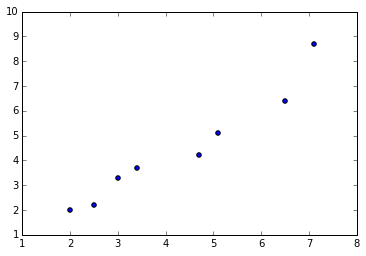

In [31]:
x1 = [2,2.5,3,  3.4,4.7,5.1,6.5,7.1]
y1 = [2,2.2,3.3,3.7,4.2,5.1,6.4,8.7]
plt.scatter(x1,y1)
plt.show()

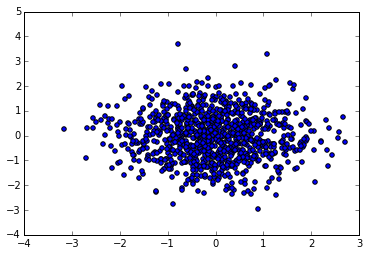

In [32]:
x2 = np.random.randn(1000)
y2 = np.random.randn(1000)
plt.scatter(x2, y2);
plt.show()

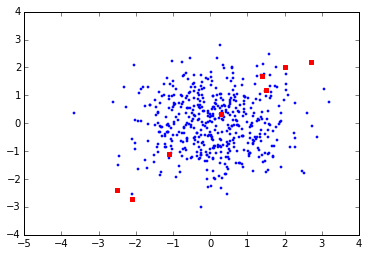

In [33]:
x1 = [2,1.5,0.3,1.4,2.7,-1.1,-2.5,-2.1]
y1 = [2,1.2,0.33,1.7,2.2,-1.1,-2.4,-2.7]
x2 = np.random.randn(500)
y2 = np.random.randn(500)
plt.scatter(x2,y2,marker="o",color="blue",s=3)
plt.scatter(x1,y1,marker="s",color="red", s=10)
plt.show()

### Links

<ul>
<li><a href="http://matplotlib.org/">Matplotlib</a>  -- (<a href="http://matplotlib.org/api/pyplot_summary.html">pyplot doku</a>)</li>
<li><a href="http://web.stanford.edu/~mwaskom/software/seaborn/index.html">Seaborn: statistical data visualization</a></li>
</ul>